Day 2 exercise

## Superdense coding

[Sending classical information using qubits]

The problem: Alice wants to send classical information to Bob, say one of four cricketers, Virat, Sachin, Ganguly and Dravid. She can either send her preference using classical bits or qubits, and we will see that if Alice and Bob share entanglement, Alice only needs to send half the number of qubits as she would bits.

What you would do classically?

Well, classically for the `4` possibilities, Alice has to send two bits of classical information. For example, `00` for `Virat`, `01` for `Sachin`, `10` for `Ganguly` and `11` for `Dravid`.

#### The Quantum solution:

Using superdense protocol Alice can just send 1 qubit to Bob and convey her choice.
The protocol is as follows:
1. Alice and Bob share an entangled state.
2. Alice choses the two classical bits, she wants to send to Bob.
3. Alice applies the following gate on her shared entangled qubit, depending on the choice.

| Alice's choice     | Gate on Alice's qubit|
|--------------------|----------------------|
| 00                 | I                    |
| 01                 | X                    |
| 10                 | Z                    |
| 11                 | ZX                   |

4. Now Alice sends her qubit to Bob.
5. Bob performs the Bell basis measurement.

The above protocol is the standard `superdense coding`.

In [1]:
# Import pennylane module
import pennylane as qml

In [2]:
# Prepares the Bell state.
def bell_state():
    # Your code goes here ->
    qml.Hadamard(wires="a")
    qml.CNOT(wires=["a","b"])

Task: Design Alice' operation according to the table

In [3]:
# Alice's operations:
def alice(message: str):
    # Your code goes here ->
    if message == "00":
        qml.Identity(wires="a")
    if message == "01":
        qml.PauliX(wires="a")
    if message == "10":
        qml.PauliZ(wires="a")
    if message == "11":
        qml.PauliX(wires="a")
        qml.PauliZ(wires="a")

Now Alice sends her qubit to Bob and thus, Bob has both the qubits.

Task: Write down the code for Bell basis transformation from computational basis.

In [4]:
# Bell basis measurement:
def bell_basis_transform():
    qml.CNOT(wires=["a","b"])
    qml.Hadamard(wires="a")

In [5]:
# Define a quantum device
device = qml.device("default.qubit", wires=["a", "b"])

@qml.qnode(device)
# The complete protocol
def superdense(message: str):
    # Your code goes here ->
    bell_state()
    alice(message=message)
    bell_basis_transform()
    # returns probabilities of the computational basis states
    return qml.probs(wires=["a","b"])

In [6]:
message="10"

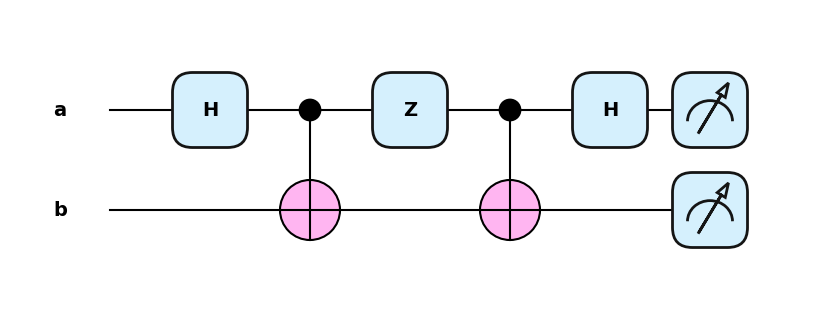

In [7]:
# Visualize the teleportation circuit
_ = qml.draw_mpl(superdense, style="pennylane")(message)

In [8]:
# Execute the protocol
superdense(message)

tensor([0., 0., 1., 0.], requires_grad=True)